<a href="https://colab.research.google.com/github/deathinvader68/Forex-and-Stock-Python-Trade-Model/blob/master/AI_ML_Workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI/ML Workshop 2

## Unsupervised Learning

In [ ]:
import pandas as pd #Library to Work with Data
import matplotlib.pyplot as plt #Library to plot our Results
from sklearn.cluster import KMeans #Library that contains our ML model

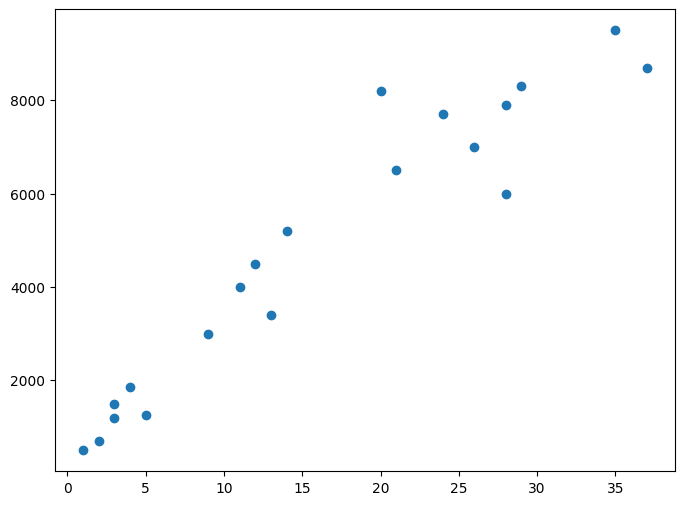

In [ ]:
#1) IMPORTING THE DATA ------------------------------------------------------------------
data = {
    'Customer': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Helen', 'Ian', 'Jack',
                 'Kate', 'Leo', 'Mona', 'Nina', 'Oscar', 'Paul', 'Quinn', 'Rose', 'Steve', 'Tom'],
    'Monthly Visits': [1, 2, 3, 3, 4, 5, 9, 13, 11, 12,
                       14, 28, 21, 26, 20, 24, 28, 29, 35, 37],
    'Annual Spending ($)': [500, 700, 1200, 1500, 1850, 1250, 3000, 3400, 4000, 4500,
                            5200, 6000, 6500, 7000, 8200, 7700, 7900, 8300, 9500, 8700]
}

df = pd.DataFrame(data)  # Convert dictionary to pandas DataFrame


plt.figure(figsize=(8, 6))
plt.scatter(df['Monthly Visits'], df['Annual Spending ($)']) #Plotting Data without Clusters (make sure to uncomment this)

In [ ]:
#2) TRAINING DATA -----------------------------------------------------------------------

kmeans = KMeans(n_clusters = 2, random_state = 42)
# !!CODE HERE!!

In [ ]:
#3) PREDICTING DATA ---------------------------------------------------------------------

cluster = kmeans.fit_predict(df[['Monthly Visits', 'Annual Spending ($)']])
# !!CODE HERE!!

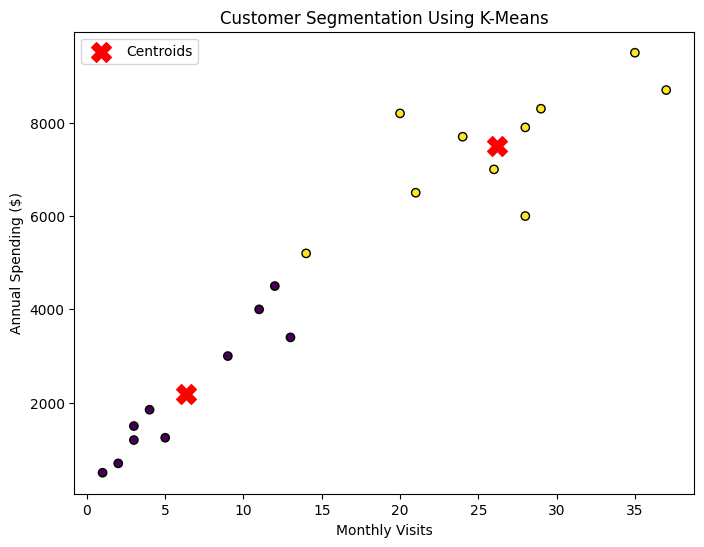

   Customer  Monthly Visits  Annual Spending ($)
0     Alice               1                  500
1       Bob               2                  700
2   Charlie               3                 1200
3     David               3                 1500
4      Emma               4                 1850
5     Frank               5                 1250
6     Grace               9                 3000
7     Helen              13                 3400
8       Ian              11                 4000
9      Jack              12                 4500
10     Kate              14                 5200
11      Leo              28                 6000
12     Mona              21                 6500
13     Nina              26                 7000
14    Oscar              20                 8200
15     Paul              24                 7700
16    Quinn              28                 7900
17     Rose              29                 8300
18    Steve              35                 9500
19      Tom         

In [ ]:
#4) PLOTTING RESULTS --------------------------------------------------------------------
plt.figure(figsize=(8, 6))

plt.scatter(df['Monthly Visits'], df['Annual Spending ($)'], c= cluster, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

#Plotting Details
plt.xlabel('Monthly Visits')
plt.ylabel('Annual Spending ($)')
plt.title('Customer Segmentation Using K-Means')
plt.legend()
plt.show()

# Display the DataFrame with clusters
print(df)

## Supervised Learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #Importing Preprocessing Tools
from sklearn.model_selection import train_test_split #Tool to Split the Data into Training and Testing
from sklearn.neighbors import KNeighborsClassifier #Importing our Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Used to see data results

#1) IMPORTING THE DATA ------------------------------------------------------------------
df = pd.read_csv('/content/Telco-Customer-Churn.csv') #df stands for DataFrame

print("Rows and Columns:", df.shape) #Get total number of rows and columns

Rows and Columns: (7043, 21)


In [ ]:
#2) DATA HANDLING  ----------------------------------------------------------------------
print("Columns of Our Data:", df.columns)

#2.1) Removing Unnecessary Data
columns_removed = ['customerID', 'gender', 'SeniorCitizen',
                   'Partner', 'Dependents', 'InternetService',
                   'Contract', 'PaperlessBilling', 'PaymentMethod'] #These are the columns that we want to remove

df.drop(columns_removed, axis= 1, inplace= True)

print("New Rows and Columns:", df.shape) #Get total number of rows and columns
print("Columns of Our Data after Dropping Columns:", df.columns)

#2.2) Enconding Data
categorical_features = []

#We need to get the columns that have words instead of numbers, because we can't work with words like "Yes" or "No" in a ML Model
for column in df:
    if df[column].dtype == object:
        categorical_features.append(column)

#After getting the columns with words, now we can encode them by turning these words (Yes/No) into numbers (1/0)
label_encoder = LabelEncoder()

for column in categorical_features:
    df[column] = label_encoder.fit_transform(df[column])

#2.3) Scaling Our Data
#We need to scale our data to adjust proportionally their values to a certain common range (Like from 0 to 1)
#so no feature/column with different range can bias our model
minmax_scaler = MinMaxScaler()

scaled_data = minmax_scaler.fit_transform(df) #Calculate and Scale the new set of data with a common range (from to 0 to 1)

scaled_df = pd.DataFrame(scaled_data, columns= df.columns) #Create a new DataFrame with the scaled data

#2.4) Spliting the Data into Training and Testing Data
x = scaled_df.drop(columns= ['Churn']) #Features
y = scaled_df['Churn'] #Target Column

#Now, since we have a large DataSet, we can split it into a training dataset and a testing dataset, and
#for that, the parameter "test_size" will take, in this case, 30% of our data to be testing and 70% for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)


Columns of Our Data: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
New Rows and Columns: (7043, 15)
Columns of Our Data after Dropping Columns: Index(['tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
#3) TRAINING DATA -------------------------------------------------------------------

#In this case, we are using 5 neighbors to our model
knn = KNeighborsClassifier(n_neighbors= 5, weights= 'distance', metric= 'euclidean')

knn.fit(x_train, y_train) #Train the Data

KNeighborsClassifier(metric='euclidean', weights='distance')

In [ ]:
#4) PREDICTING DATA  ----------------------------------------------------------------

y_predict = knn.predict(x_test) #Predict the Testing data

#Get Accuracy of our Model
points = 0
size = len(y_test)
for index in range(size):
    if y_test.iloc[index] == y_predict[index]: #If we match the same value for the row, we increase our points
        points += 1

accuracy = points / size #Divide the number of values we predicted correctly with the total number of values in the test

print(f"Accuracy of our KNN model: {accuracy * 100:.2f}%")

Accuracy of our KNN model: 75.86%


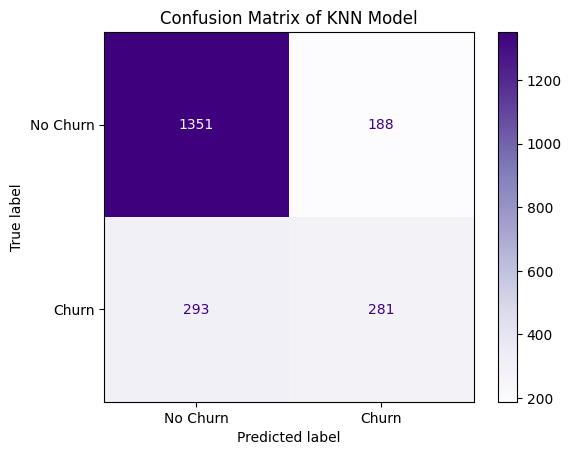

In [ ]:
#5) PLOTTING OUR RESULTS -----------------------------------------------------------------

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict) #Here, we use the actual values (y_test) and the values we predicted (y_predict)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap= "Purples")
plt.title("Confusion Matrix of KNN Model")
plt.show()